In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
import plotly.express as px

In [3]:
data = pd.read_csv('data_vsh_cluster.csv', sep=',')
#data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE':'CONFIDENCE'},inplace=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,...,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE,IGR,GRMIN,GRMAX,LITHOLOGY_VALUE,VSH
0,0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,...,NaN,NaN,NaN,Shale,1.0,0.150172,6.191506,499.022583,2,0.055626
1,1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,...,NaN,NaN,NaN,Shale,1.0,0.148269,6.191506,499.022583,2,0.054844
2,2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,...,NaN,NaN,NaN,Shale,1.0,0.139258,6.191506,499.022583,2,0.051170
3,3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,...,NaN,NaN,NaN,Shale,1.0,0.135315,6.191506,499.022583,2,0.049577
4,4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,...,NaN,NaN,NaN,Shale,1.0,0.132982,6.191506,499.022583,2,0.048639


In [4]:
data1 = data.loc[data['WELL'] == '16/10-1']

In [5]:
data1.head()

,Unnamed: 0.1,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,...,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE,IGR,GRMIN,GRMAX,LITHOLOGY_VALUE,VSH
58694,58694,58694,16/10-1,439.41579,444152.125,6435549.0,-414.377716,NORDLAND GP.,NaN,19.109173,...,NaN,NaN,0.473305,Sandstone/Shale,2.0,0.154660,5.78268,300.941925,1,0.057480
58695,58695,58695,16/10-1,439.56779,444152.125,6435549.0,-414.529694,NORDLAND GP.,NaN,19.109400,...,NaN,NaN,0.469545,Sandstone/Shale,2.0,0.148021,5.78268,300.941925,1,0.054742
58696,58696,58696,16/10-1,439.71979,444152.125,6435549.0,-414.681702,NORDLAND GP.,NaN,19.109400,...,NaN,NaN,0.480736,Sandstone/Shale,2.0,0.150375,5.78268,300.941925,1,0.055710
58697,58697,58697,16/10-1,439.87179,444152.125,6435549.0,-414.833710,NORDLAND GP.,NaN,19.109400,...,NaN,NaN,0.488471,Sandstone/Shale,2.0,0.138196,5.78268,300.941925,1,0.050740
58698,58698,58698,16/10-1,440.02379,444152.125,6435549.0,-414.985687,NORDLAND GP.,NaN,19.094189,...,NaN,NaN,0.489029,Sandstone/Shale,2.0,0.144721,5.78268,300.941925,1,0.053392


In [6]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,20))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
    ax6 = ax1.twiny()
    ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax2)
    ax5 = ax4.twiny()
    ax7 = ax4.twiny()
    ax8 = ax4.twiny()
    ax9 = ax4.twiny()

    # Gamma Ray track
    ax1.plot(well["GR"], well['DEPTH_MD'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma Ray (gAPI)")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 250)
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150, 200, 250])

    # Resistivity DEEP
    ax2.plot(well["RDEP"], well['DEPTH_MD'], "--", color = "red", linewidth = 0.5)
    ax2.set_xlabel("RDEP (ohm/m)")
    ax2.semilogx()
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")

    # Resistivity MEDIUM
    ax3.plot(well["RMED"], well['DEPTH_MD'], "--", color = "blue", linewidth = 0.5)
    ax3.set_xlabel("RMED (ohm/m)")
    ax3.semilogx()
    ax3.xaxis.label.set_color("blue")
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_edgecolor("blue")
    ax3.spines["top"].set_position(("axes", 1.05))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")

    #Density
    ax4.plot(well["RHOB"], well['DEPTH_MD'], color = "blue", linewidth = 0.5)
    ax4.set_xlabel("Densityv(g/cc)")
    ax4.set_xlim(1.95, 2.95)
    ax4.xaxis.label.set_color("blue")
    ax4.tick_params(axis='x', colors="blue")
    ax4.spines["top"].set_edgecolor("blue")
    ax4.set_xticks([1.95, 2.45, 2.95]) 

    # Neutron track placed ontop of density track
    ax5.plot(well["NPHI"], well['DEPTH_MD'], "--",color = "red", linewidth = 0.5)
    ax5.set_xlabel('Neutron Porosity (pu)')
    ax5.xaxis.label.set_color("red")
    ax5.set_xlim(0.65, -0.15)
    ax5.tick_params(axis='x', colors="red")
    ax5.spines["top"].set_position(("axes", 1.05))
    ax5.spines["top"].set_visible(True)
    ax5.spines["top"].set_edgecolor("red")
    ax5.set_xticks([0.65,  0.15, -0.15])

    #PEF
    ax7.plot(well["PEF"], well['DEPTH_MD'], "--",color = "black", linewidth = 0.5)
    ax7.set_xlabel("PEF")
    ax7.set_xlim(0, 30)
    ax7.xaxis.label.set_color("black")
    ax7.tick_params(axis='x', colors="black")
    ax7.spines["top"].set_position(("axes", 1.08))
    ax7.spines["top"].set_visible(True)
    ax7.spines["top"].set_edgecolor("black")
    ax7.set_xticks([0, 15, 30]) 

    #DRHO
    ax8.plot(well["DRHO"], well['DEPTH_MD'], "--",color = "black", linewidth = 0.5)
    ax8.set_xlabel("DRHO (g/cc)")
    ax8.set_xlim(-1.5, 0.5)
    ax8.xaxis.label.set_color("black")
    ax8.tick_params(axis='x', colors="black")
    ax8.spines["top"].set_position(("axes", 1.11))
    ax8.spines["top"].set_visible(True)
    ax8.spines["top"].set_edgecolor("black")
    ax8.set_xticks([-1.5, -0.5, 0.5]) 

    #DTC
    ax9.plot(well["DTC"], well['DEPTH_MD'], "--",color = "green", linewidth = 0.5)
    ax9.set_xlabel("DTC (us/ft)")
    ax9.set_xlim(200, 40)
    ax9.xaxis.label.set_color("green")
    ax9.tick_params(axis='x', colors="green")
    ax9.spines["top"].set_position(("axes", 1.14))
    ax9.spines["top"].set_visible(True)
    ax9.spines["top"].set_edgecolor("green")
    ax9.set_xticks([200, 140, 20]) 

    #Caliper
    ax6.plot(well["CALI"], well['DEPTH_MD'], "--", color = "blue", linewidth = 0.5)
    ax6.set_xlabel("Caliper (in)")
    ax6.set_xlim(6, 16)
    ax6.xaxis.label.set_color("blue")
    ax6.tick_params(axis='x', colors="blue")
    ax6.spines["top"].set_position(("axes", 1.05))
    ax6.spines["top"].set_visible(True)
    ax6.spines["top"].set_edgecolor("blue")
    ax6.set_xticks([6, 16])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax1, ax3, ax4, ax5, ax6, ax7, ax8]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0.15)
    

C:\Users\Samuel Brand\AppData\Local\Temp\ipykernel_992\2953937816.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


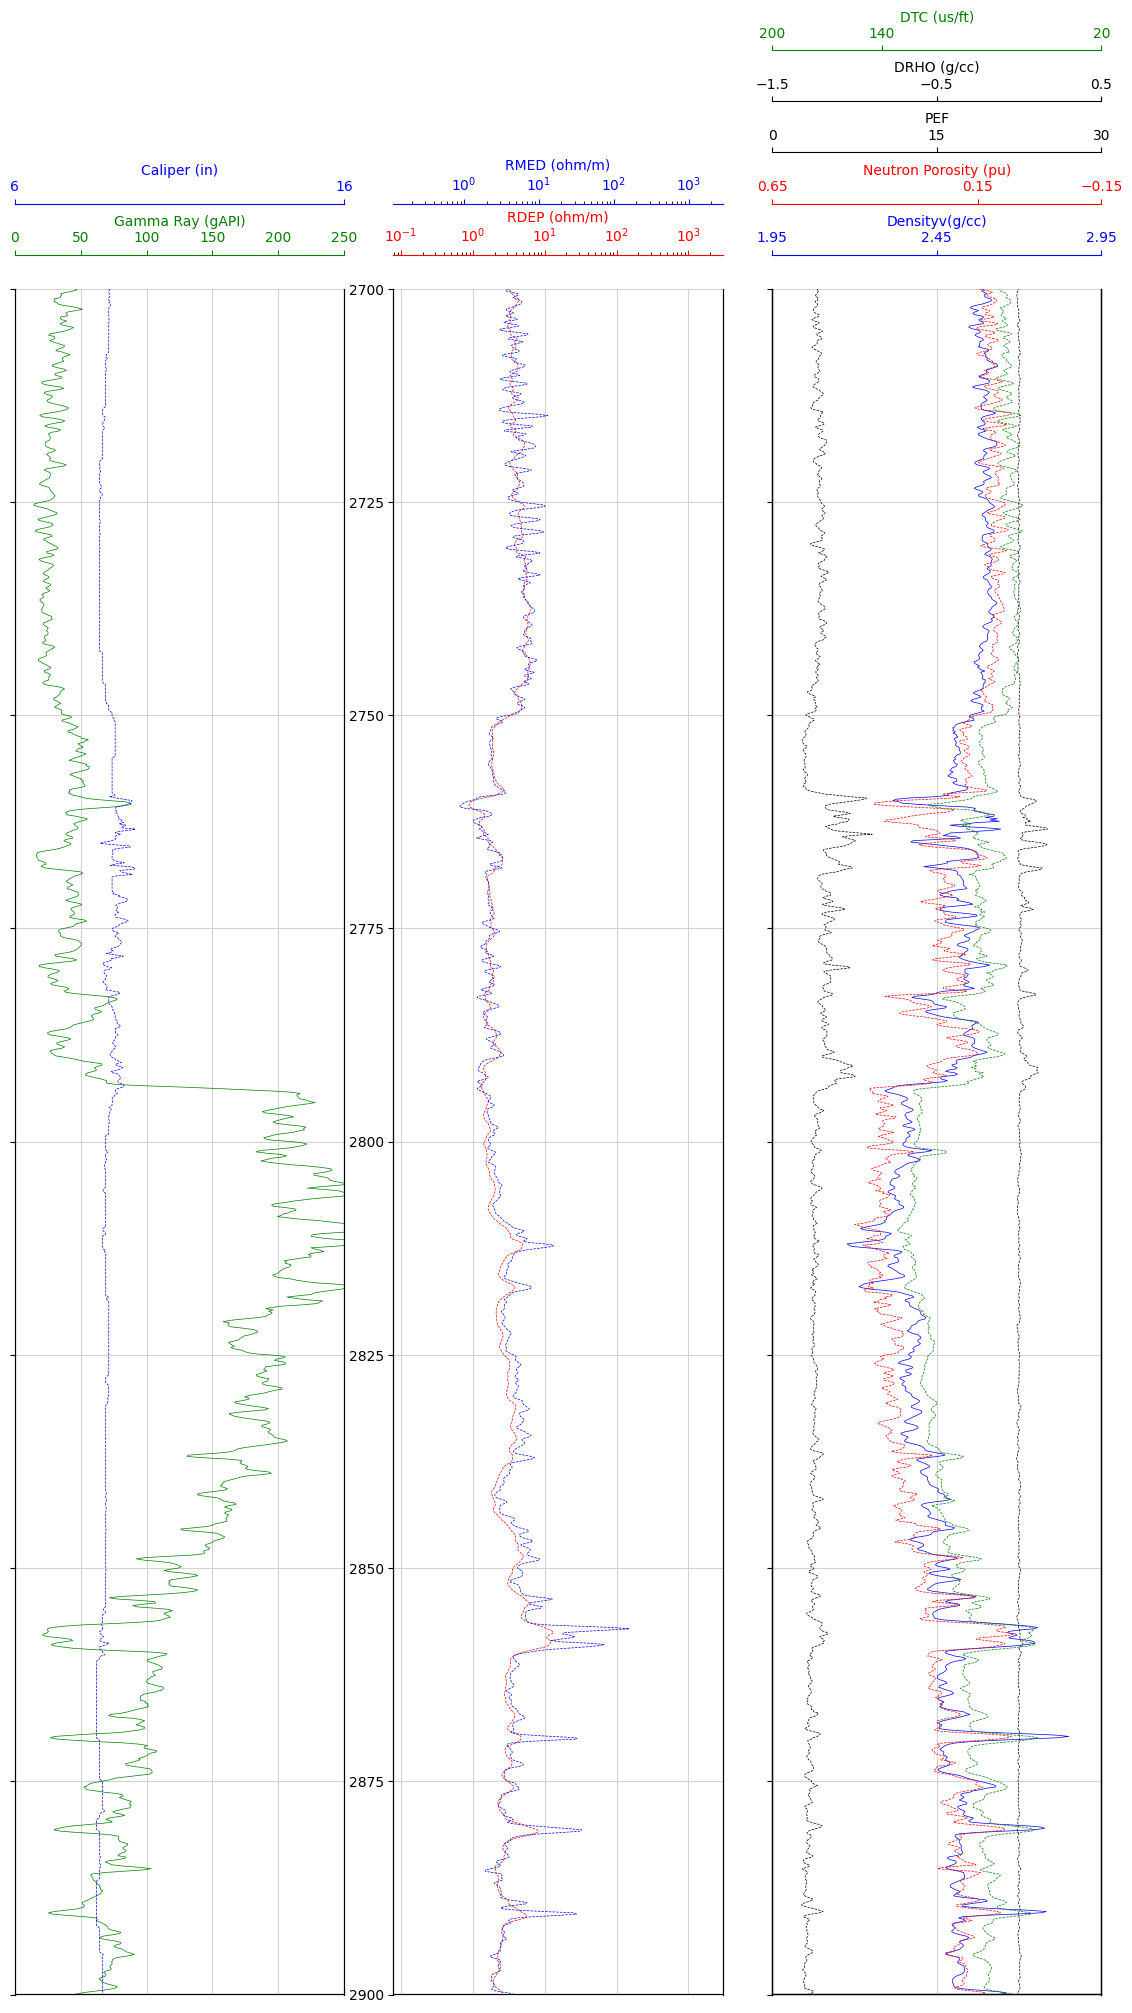

In [7]:
makeplot(data1, 2700, 2900)

# With VSH

In [8]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,20))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
    ax6 = ax1.twiny()
    ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax2)
    ax5 = ax4.twiny()
    ax7 = ax4.twiny()
    ax8 = ax4.twiny()
    ax9 = ax4.twiny()
    ax10 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)

    # Gamma Ray track
    ax1.plot(well["GR"], well['DEPTH_MD'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma Ray (gAPI)")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 250)
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150, 200, 250])

    # Resistivity DEEP
    ax2.plot(well["RDEP"], well['DEPTH_MD'], "--", color = "red", linewidth = 0.5)
    ax2.set_xlabel("RDEP (ohm/m)")
    ax2.semilogx()
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")

    # Resistivity MEDIUM
    ax3.plot(well["RMED"], well['DEPTH_MD'], "--", color = "blue", linewidth = 0.5)
    ax3.set_xlabel("RMED (ohm/m)")
    ax3.semilogx()
    ax3.xaxis.label.set_color("blue")
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_edgecolor("blue")
    ax3.spines["top"].set_position(("axes", 1.05))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")

    #Density
    ax4.plot(well["RHOB"], well['DEPTH_MD'], color = "blue", linewidth = 0.5)
    ax4.set_xlabel("Densityv(g/cc)")
    ax4.set_xlim(1.95, 2.95)
    ax4.xaxis.label.set_color("blue")
    ax4.tick_params(axis='x', colors="blue")
    ax4.spines["top"].set_edgecolor("blue")
    ax4.set_xticks([1.95, 2.45, 2.95]) 

    # Neutron track placed ontop of density track
    ax5.plot(well["NPHI"], well['DEPTH_MD'], "--",color = "red", linewidth = 0.5)
    ax5.set_xlabel('Neutron Porosity (pu)')
    ax5.xaxis.label.set_color("red")
    ax5.set_xlim(0.65, -0.15)
    ax5.tick_params(axis='x', colors="red")
    ax5.spines["top"].set_position(("axes", 1.05))
    ax5.spines["top"].set_visible(True)
    ax5.spines["top"].set_edgecolor("red")
    ax5.set_xticks([0.65,  0.15, -0.15])

    #PEF
    ax7.plot(well["PEF"], well['DEPTH_MD'], "--",color = "black", linewidth = 0.5)
    ax7.set_xlabel("PEF")
    ax7.set_xlim(0, 30)
    ax7.xaxis.label.set_color("black")
    ax7.tick_params(axis='x', colors="black")
    ax7.spines["top"].set_position(("axes", 1.08))
    ax7.spines["top"].set_visible(True)
    ax7.spines["top"].set_edgecolor("black")
    ax7.set_xticks([0, 15, 30]) 

    #DRHO
    ax8.plot(well["DRHO"], well['DEPTH_MD'], "--",color = "black", linewidth = 0.5)
    ax8.set_xlabel("DRHO (g/cc)")
    ax8.set_xlim(-1.5, 0.5)
    ax8.xaxis.label.set_color("black")
    ax8.tick_params(axis='x', colors="black")
    ax8.spines["top"].set_position(("axes", 1.11))
    ax8.spines["top"].set_visible(True)
    ax8.spines["top"].set_edgecolor("black")
    ax8.set_xticks([-1.5, -0.5, 0.5]) 

    #DTC
    ax9.plot(well["DTC"], well['DEPTH_MD'], "--",color = "green", linewidth = 0.5)
    ax9.set_xlabel("DTC (us/ft)")
    ax9.set_xlim(200, 40)
    ax9.xaxis.label.set_color("green")
    ax9.tick_params(axis='x', colors="green")
    ax9.spines["top"].set_position(("axes", 1.14))
    ax9.spines["top"].set_visible(True)
    ax9.spines["top"].set_edgecolor("green")
    ax9.set_xticks([200, 140, 20]) 

    #Caliper
    ax6.plot(well["CALI"], well['DEPTH_MD'], "--", color = "blue", linewidth = 0.5)
    ax6.set_xlabel("Caliper (in)")
    ax6.set_xlim(6, 16)
    ax6.xaxis.label.set_color("blue")
    ax6.tick_params(axis='x', colors="blue")
    ax6.spines["top"].set_position(("axes", 1.05))
    ax6.spines["top"].set_visible(True)
    ax6.spines["top"].set_edgecolor("blue")
    ax6.set_xticks([6, 16])

    #VSH
    ax10.plot(well["VSH"], well['DEPTH_MD'], "--", color = "blue", linewidth = 0.5)
    ax10.set_xlabel("VShale")
    ax10.set_xlim(1, 0)
    ax10.xaxis.label.set_color("blue")
    ax10.tick_params(axis='x', colors="blue")
    ax10.spines["top"].set_position(("axes", 1.05))
    ax10.spines["top"].set_visible(True)
    ax10.spines["top"].set_edgecolor("blue")
    ax10.set_xticks([1, 0])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4, ax10]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax1, ax3, ax4, ax5, ax6, ax7, ax8, ax10]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0.15)

C:\Users\Samuel Brand\AppData\Local\Temp\ipykernel_992\2411022130.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


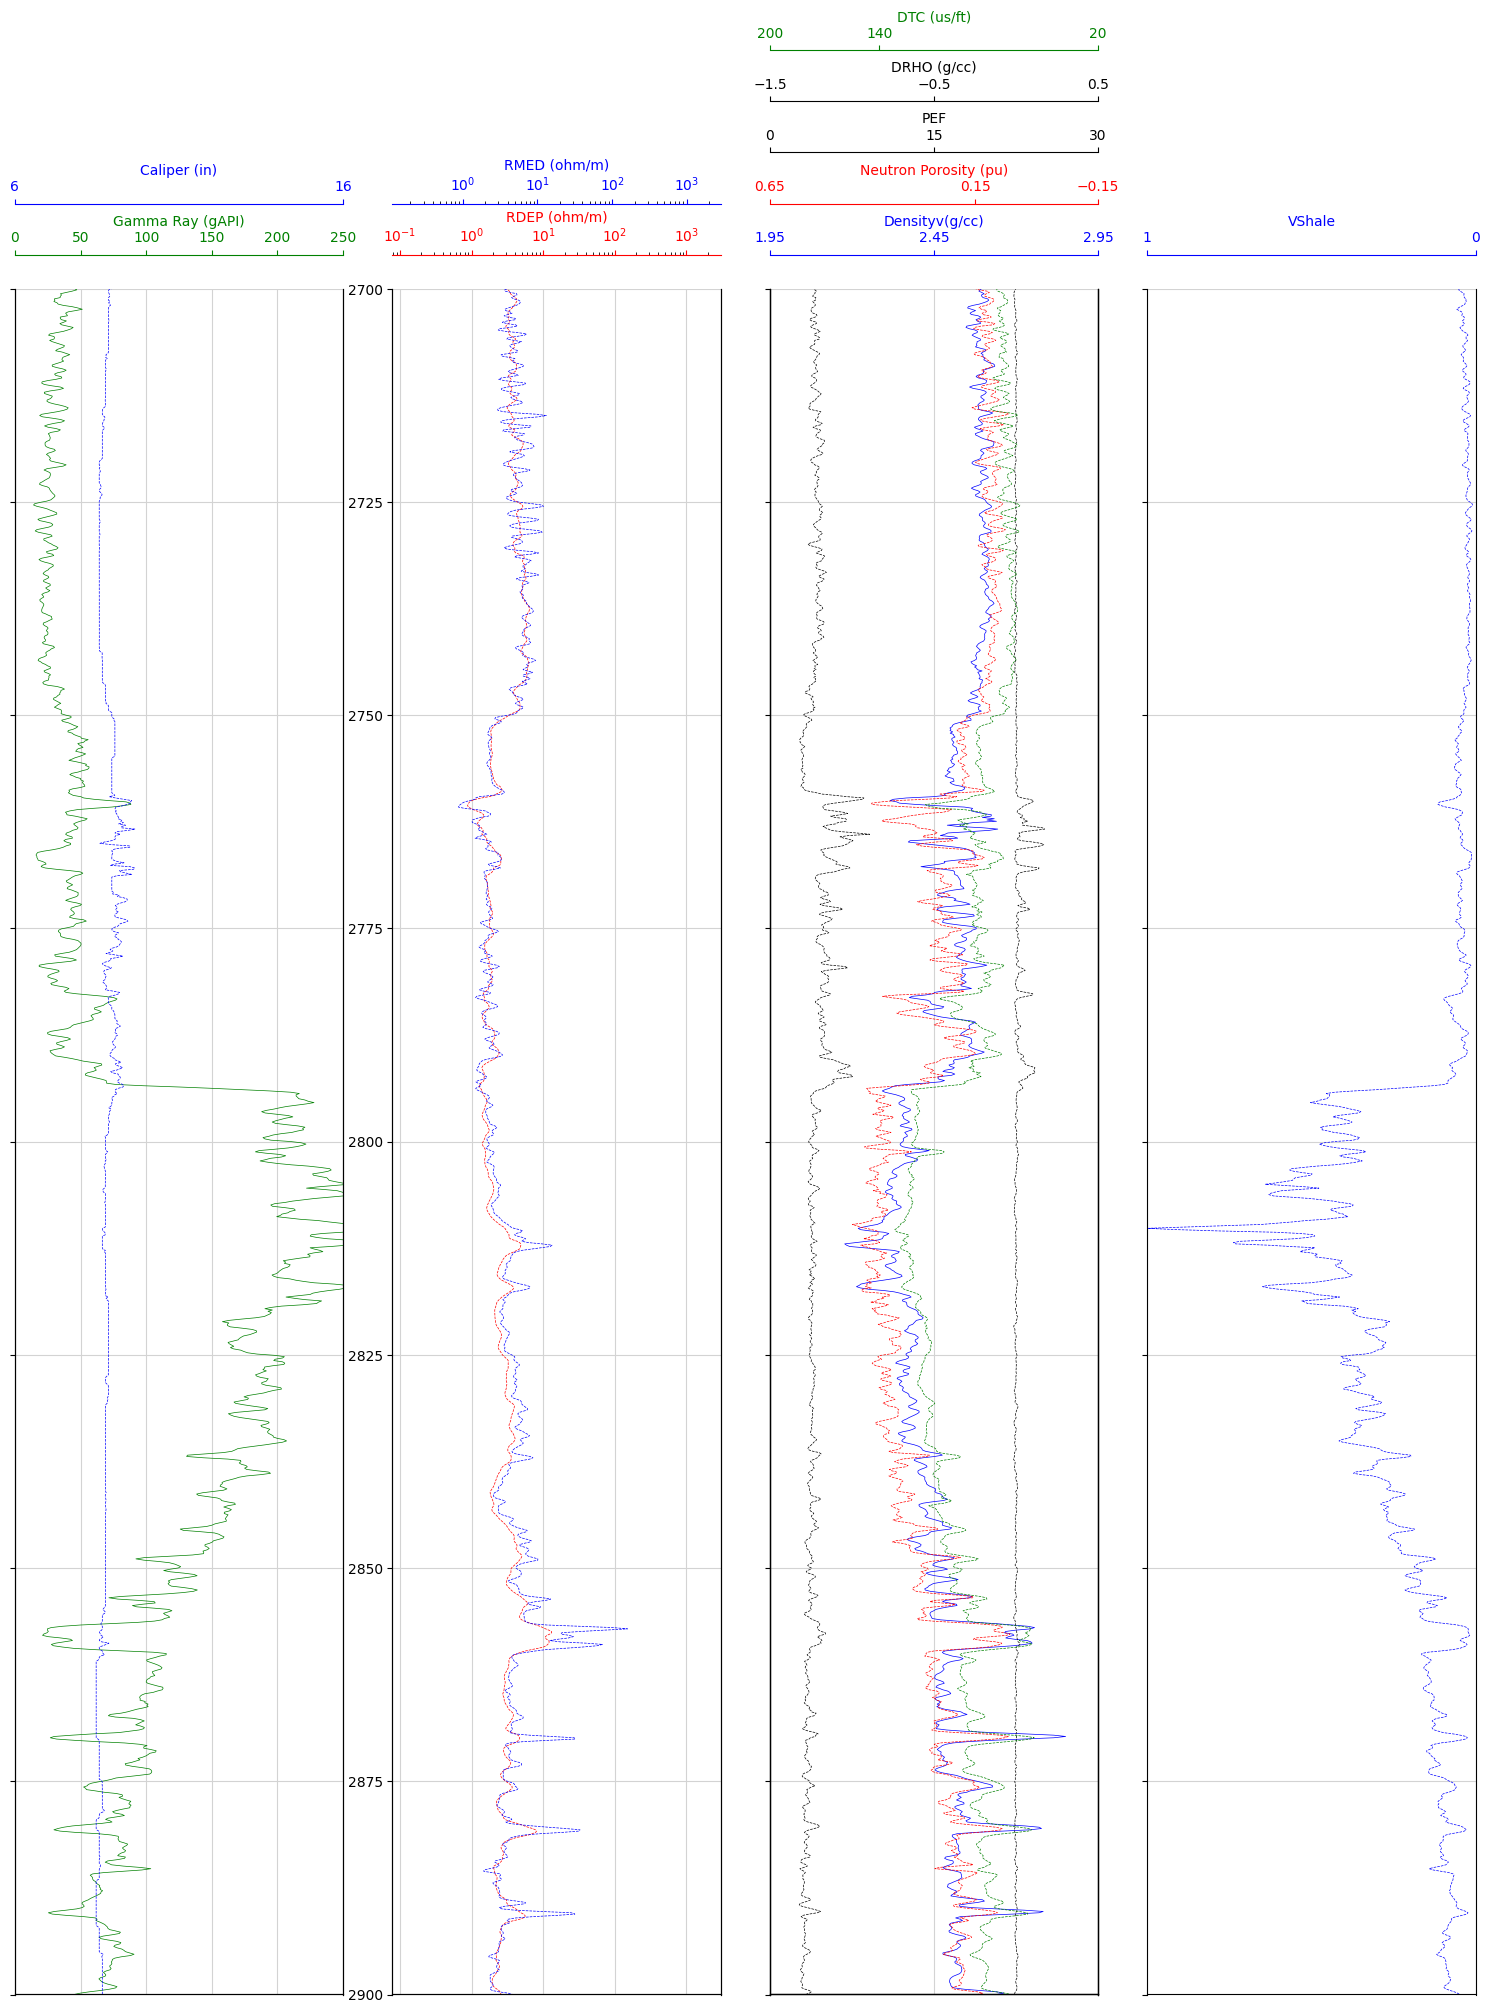

In [9]:
makeplot(data1, 2700, 2900)